The goal of this code is to implement clustering algorithm to a dataset consists of basic mall customer data (ID, age, gender, income, spending score) to determine the Spending Score.

Source:
\
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
\
https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data

# Set-up

In [32]:
# Commonly used libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# For plotting
import plotly as py
import plotly.graph_objs as go

# From scikitlearn
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Data Exploration & Preprocessing

In [33]:
# loading dataset and checking its heads!
df = pd.read_csv('datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
# checking the columns names we have
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
# checking more informaiton about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
# some stats about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for missing values

In [37]:
# checking the total amount of missing values per column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

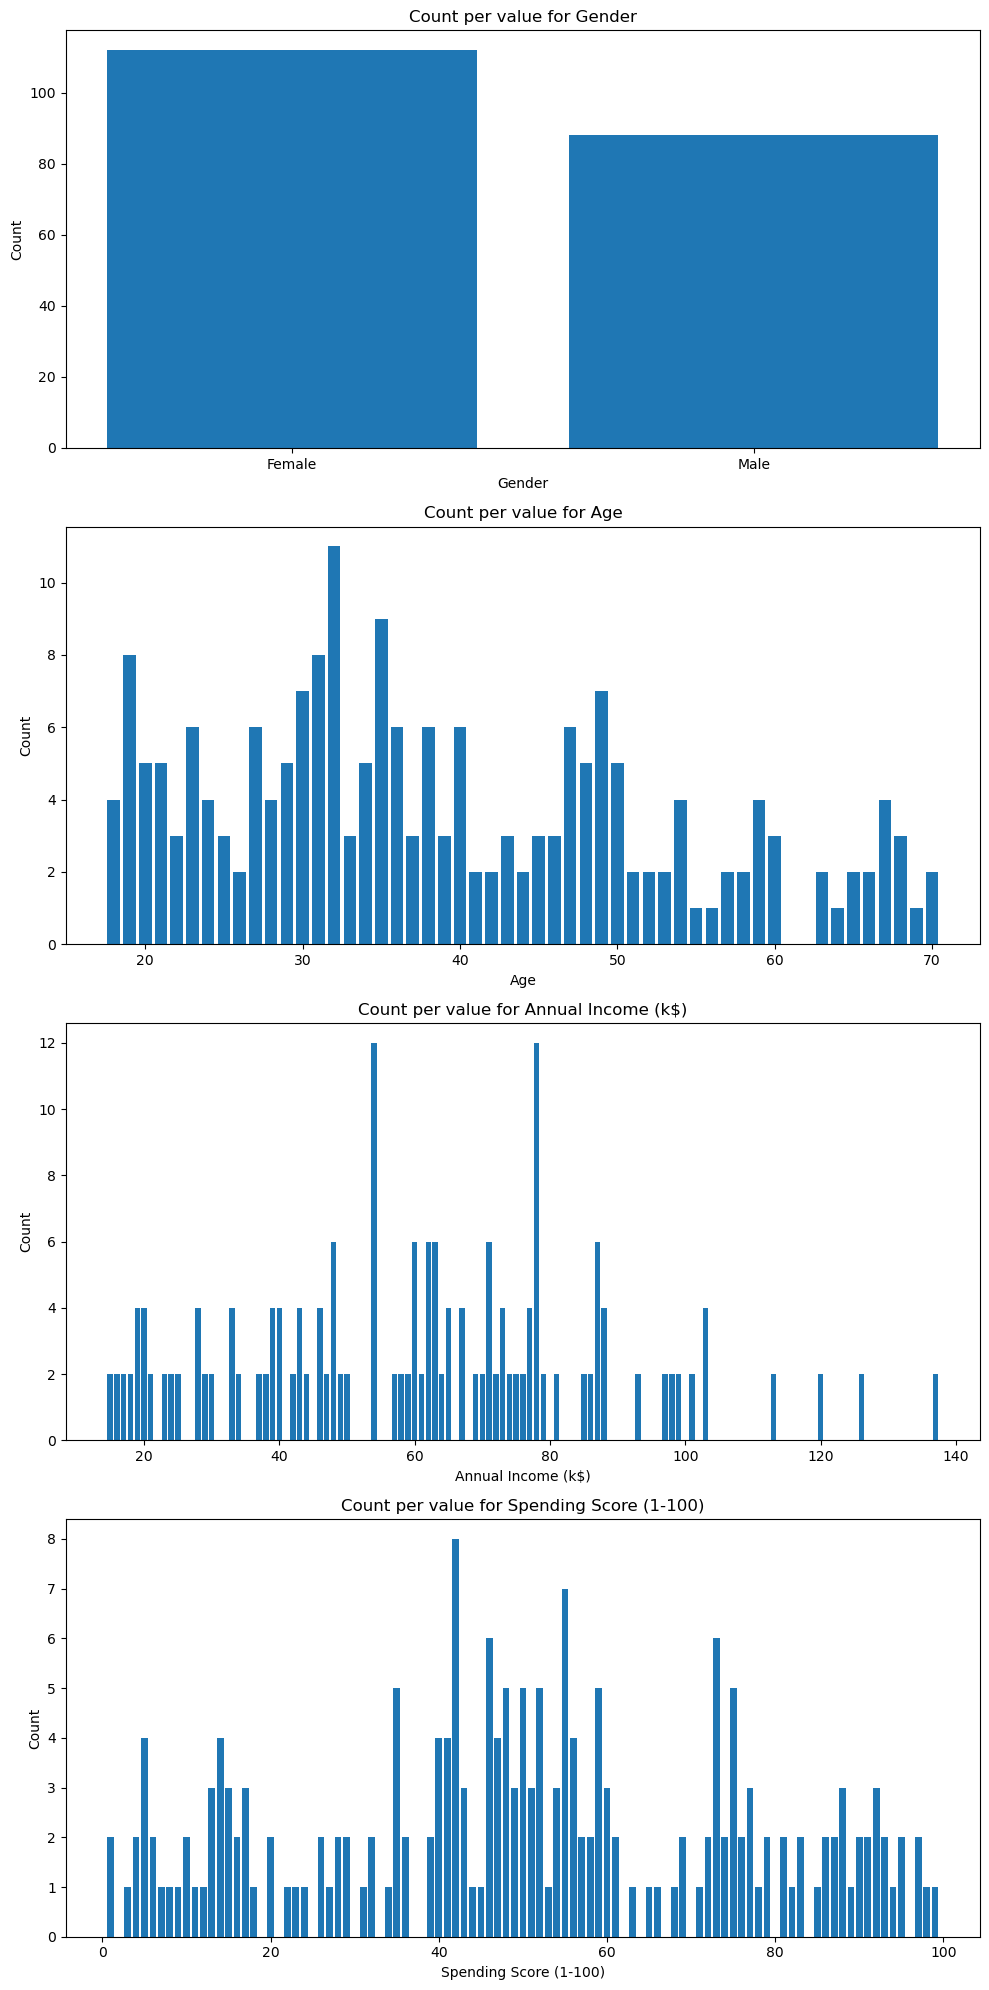

In [38]:
#ADDITIONAL EXPLORE 


# List of columns you want to plot
columns_to_plot = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a subplot for each column
fig, axs = plt.subplots(len(columns_to_plot), figsize=(10, 20))

for i, column in enumerate(columns_to_plot):
    # Count the frequency of each unique value in the column
    value_counts = df[column].value_counts()
    
    # Plot the frequencies
    axs[i].bar(value_counts.index, value_counts.values)
    
    # Set the title of the subplot
    axs[i].set_title(f'Count per value for {column}')
    
    # Set the x-label of the subplot
    axs[i].set_xlabel(column)
    
    # Set the y-label of the subplot
    axs[i].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


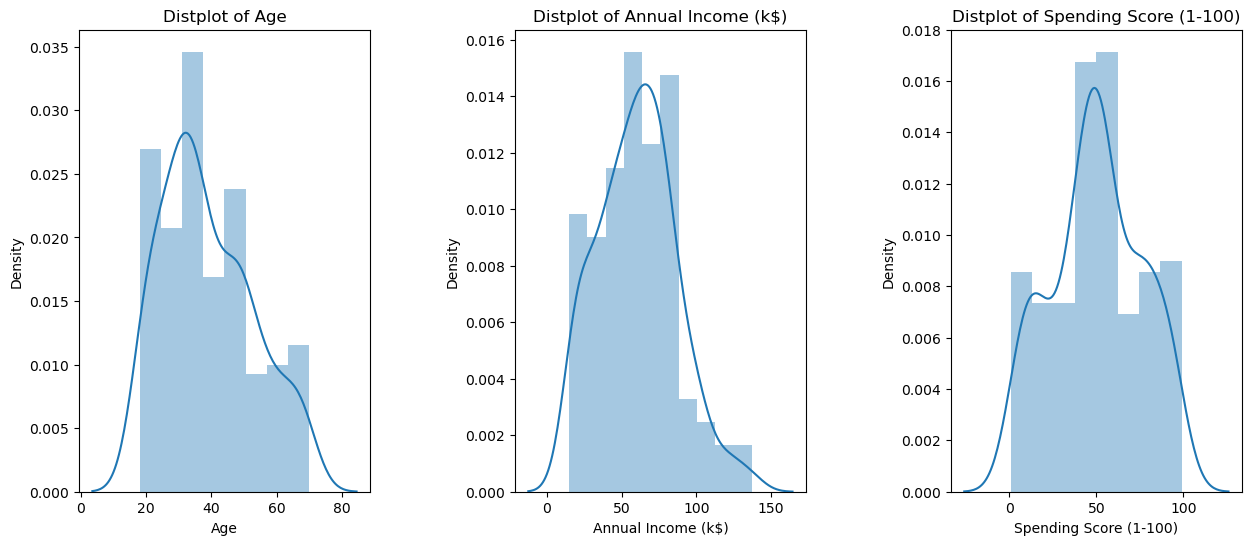

In [39]:
# ploting the histograms for the three numerical features we have and adding a density funciton over the histogram
# define figure size, number of bins and spacing between plots and bins

plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x])
    plt.title('Distplot of {}'.format(x))
plt.show()

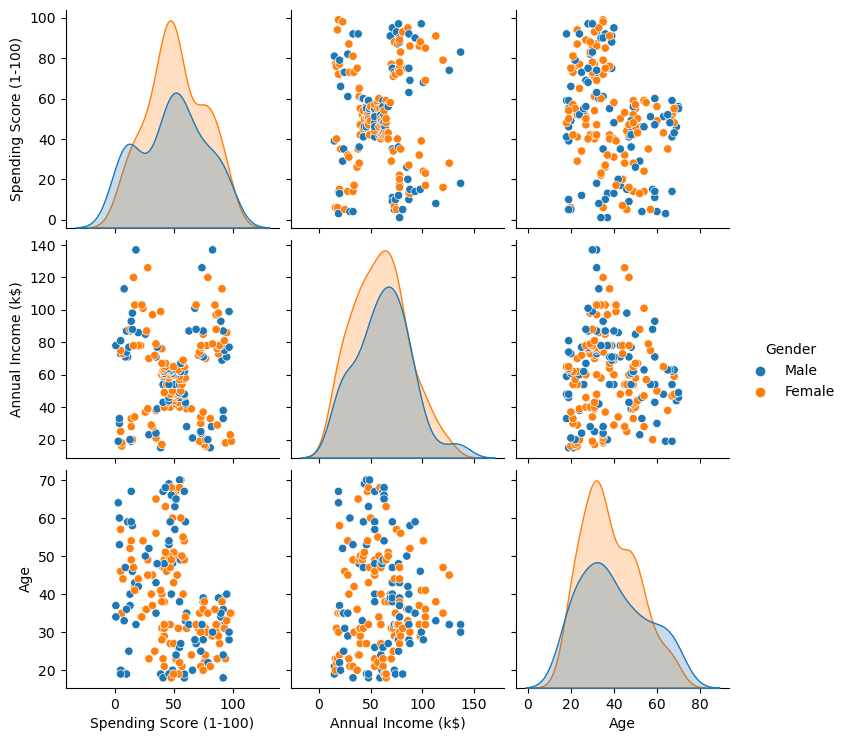

In [40]:
# pariplot to check relation between variables
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

In [41]:
# We will cluster based on 2 and 3 variables, we will check the scatter plot, and 
# Also check elbow method to support decision on selecting value for k

# Clustering Implementation

### A1. 2D Clustering based on Age and Spending Score

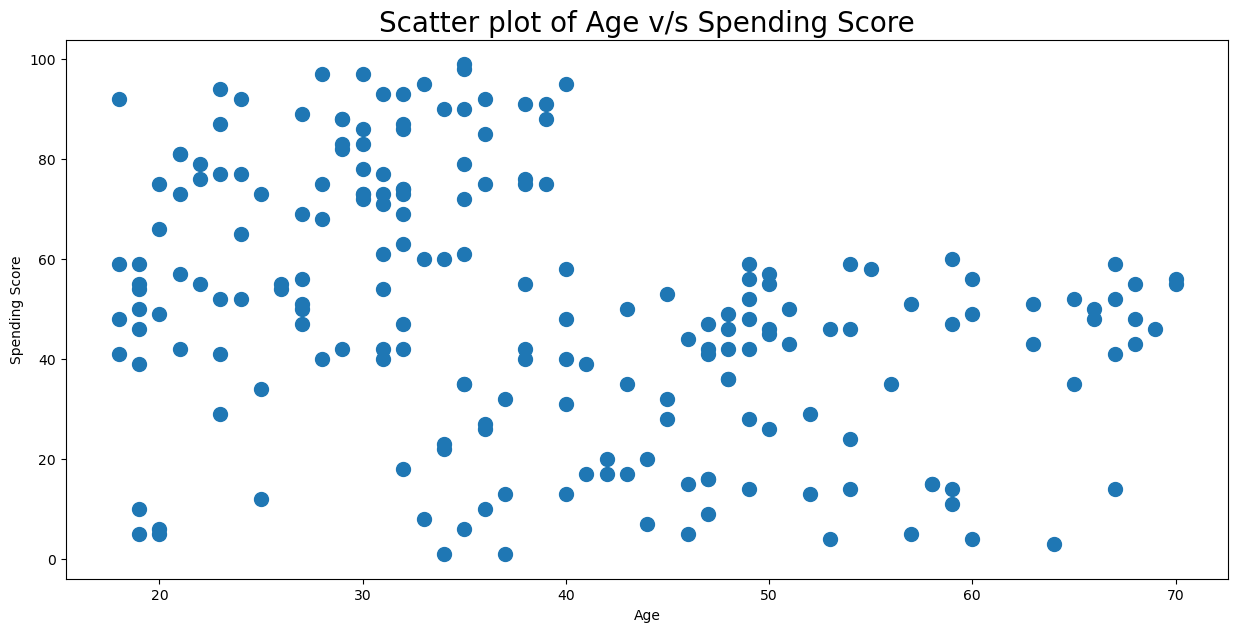

In [42]:
# This is just a scatter plot between the two variables selected in this case
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

### A2. Selecting value for k

In [43]:
# This is to generate the data (inertia per number of clusters)
# We do use k = 14 (max) and collect the inertia in each case

X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

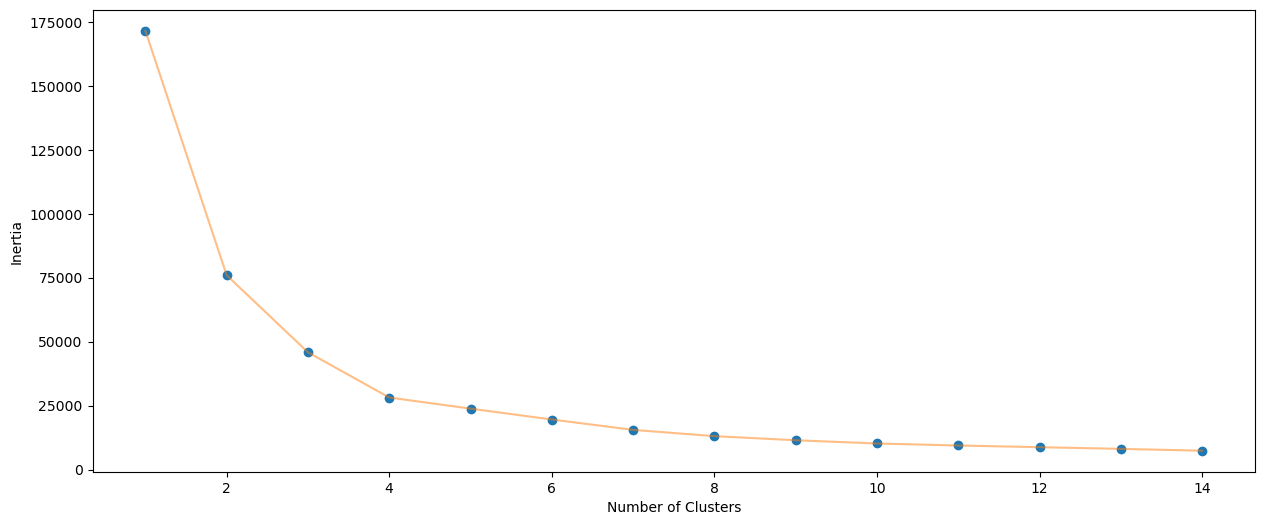

In [44]:
# This is just the elbow method plot
# We would like to select k for where the inertia does not descrease int he same ratio  (elbow of the plot)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1, 15) , inertia, 'o')
plt.plot(np.arange(1, 15) , inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### A3. Implementing with k=4

In [45]:
# This is setting up the algortihm for k=4, then fitting in the data (X1)

algorithm = (KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [46]:
# This is arranging infromation to be plotted in the graph below!

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

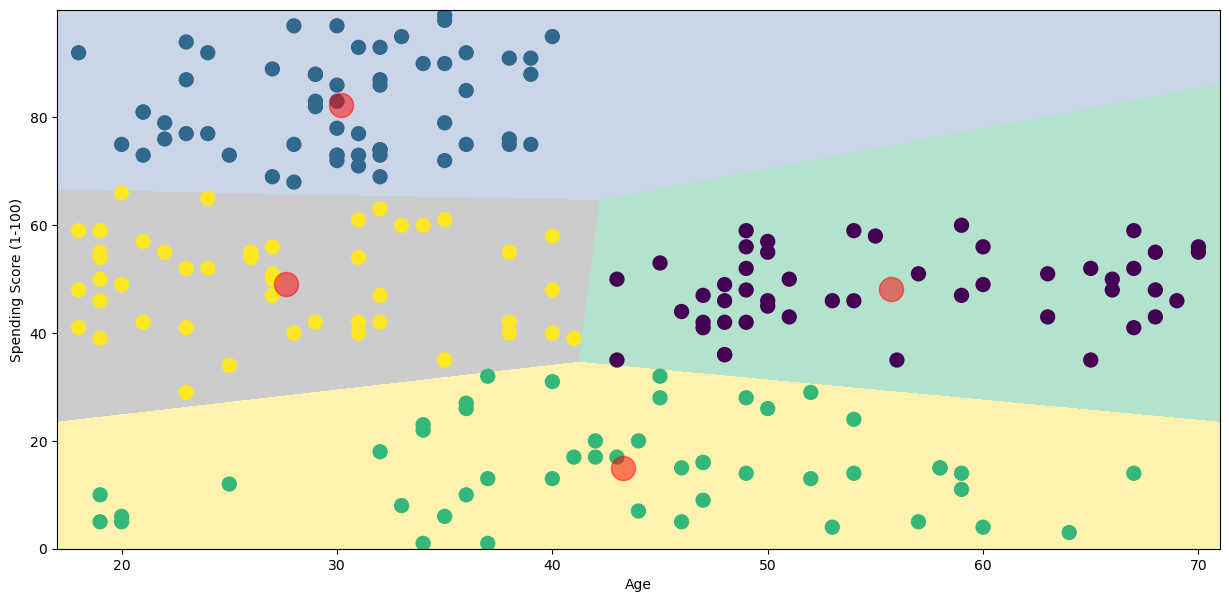

In [47]:
# This uses the set up above and buil in with the centroids, and fitting from the algorithm...

plt.figure(1, figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

### A4. Implementing with k=5

In [48]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [49]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

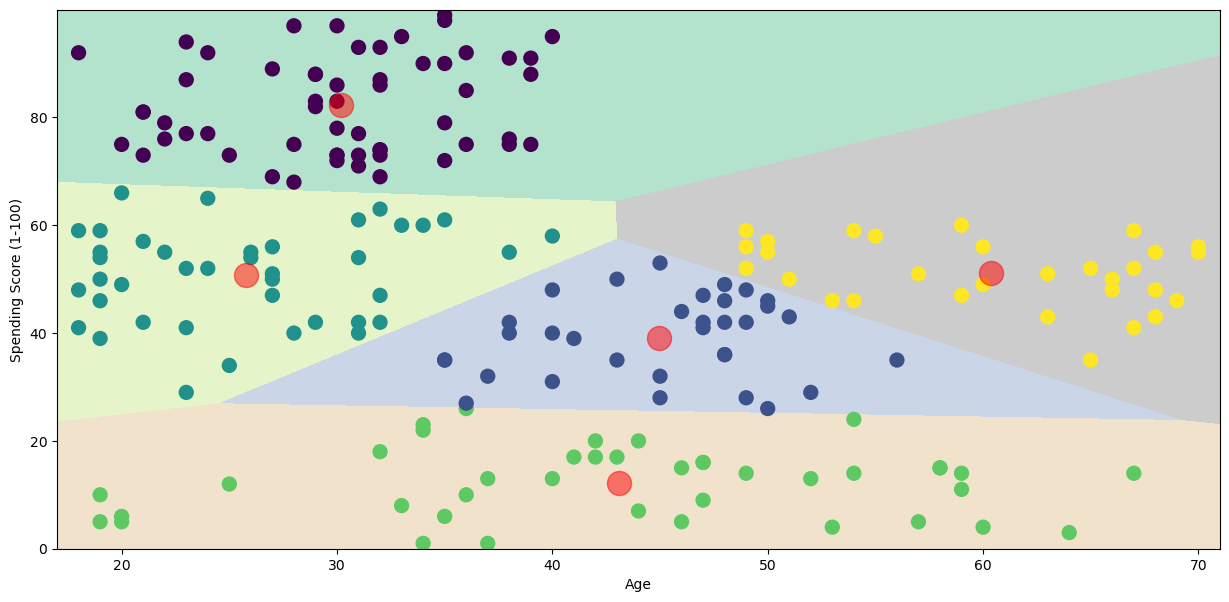

In [50]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### B1. 2D Clustering based on Annual Income and Spending Score

In [51]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

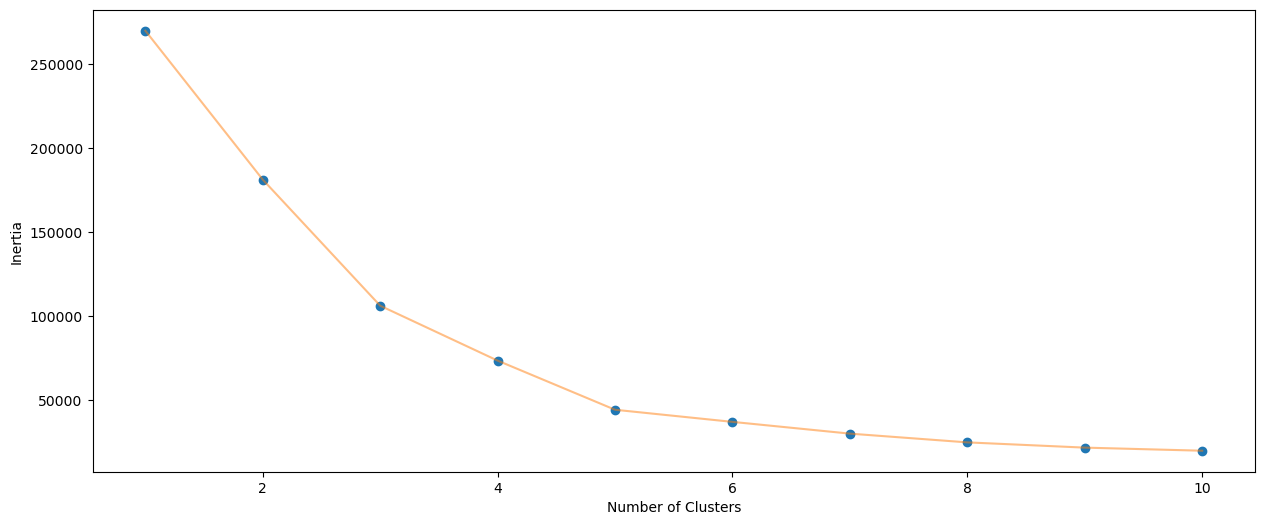

In [52]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### B2. Implementing with k=5

In [53]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [54]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

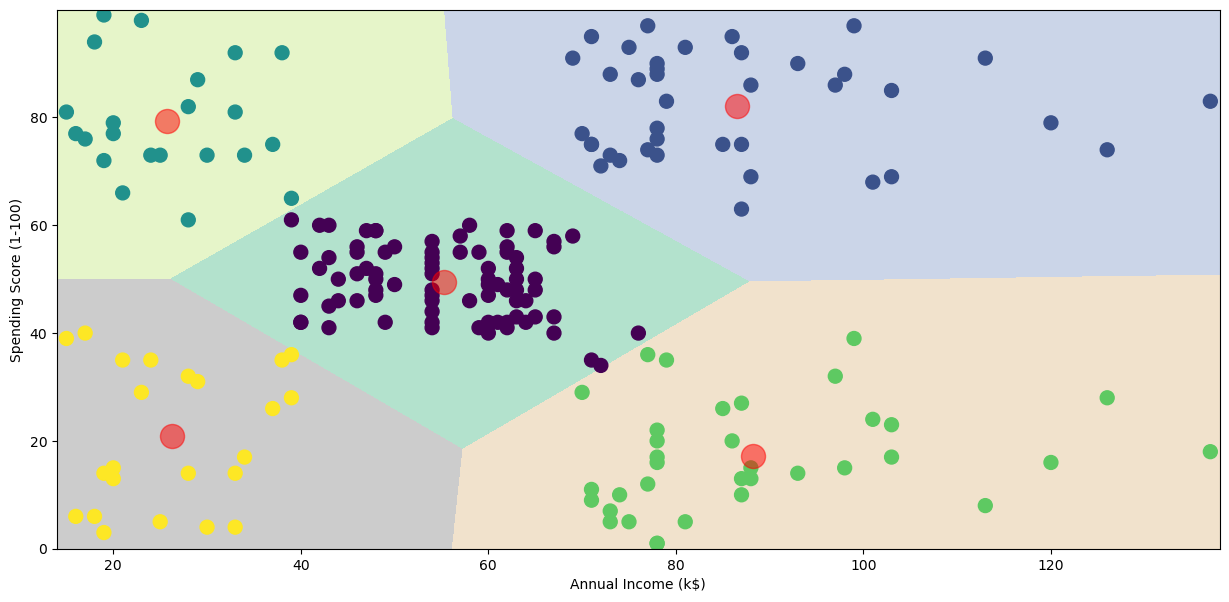

In [55]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 100)
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

### C1. 3D Clustering based on Age, Annual Income and Spending Score

In [56]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

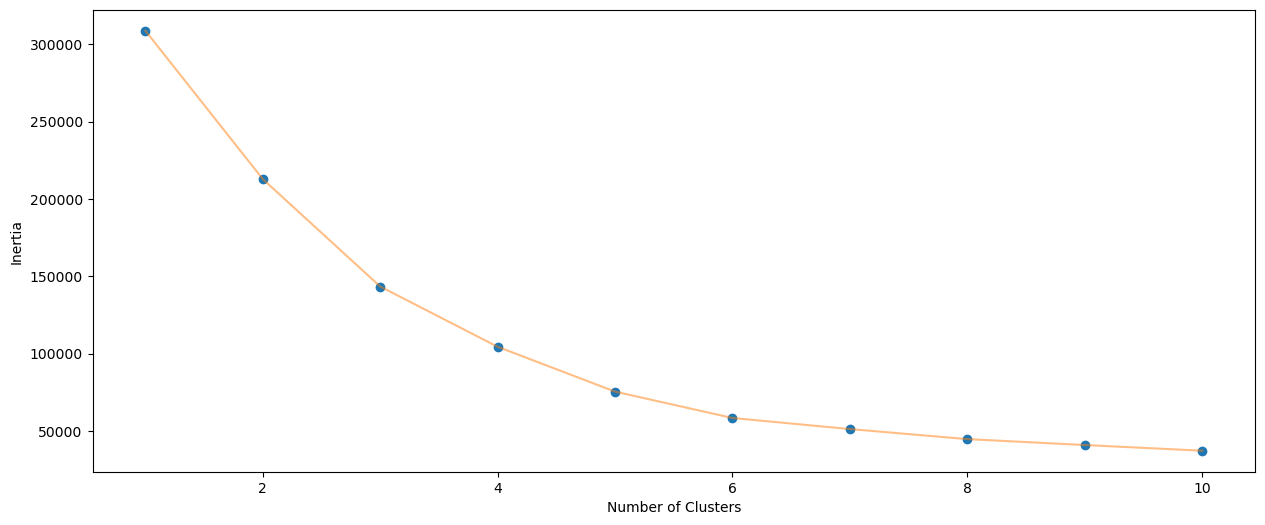

In [57]:
plt.figure(1 , figsize = (15, 6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### C2. Implementing with k=6

In [58]:
## algorithm.predict to return the label of the clusters
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [59]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)

data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [61]:
#Import cluster result to excel
df.to_excel("datasets/customers_segmented_final_kmeans.xlsx", index = False)

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Extract Descriptive Statistics
# Group by the cluster labels
grouped = df.groupby('cluster')

# Calculate descriptive statistics for each cluster
descriptive_stats = grouped.describe()

# Display the descriptive statistics
print(descriptive_stats)

        CustomerID                                                       \
             count        mean        std    min     25%    50%     75%   
cluster                                                                   
0             45.0   81.155556  22.711587   41.0   63.00   80.0  102.00   
1             35.0  164.428571  21.351795  127.0  148.00  165.0  182.00   
2             22.0   23.090909  13.147185    2.0   12.50   23.0   33.50   
3             38.0   90.052632  26.689351   44.0   69.25   93.0  112.75   
4             39.0  162.000000  22.803509  124.0  143.00  162.0  181.00   
5             21.0   21.190476  12.757817    1.0   11.00   21.0   31.00   

                 Age                                                        \
           max count       mean        std   min    25%   50%    75%   max   
cluster                                                                      
0        120.0  45.0  56.155556   8.543886  43.0  49.00  54.0  65.00  70.0   
1        199